In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/aug_rust2/Train'
valid_path = '/content/drive/MyDrive/aug_rust2/Test'

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/aug_rust2/Train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [ ]:
folders

['/content/drive/MyDrive/aug_rust2/Train/Healthy',
 '/content/drive/MyDrive/aug_rust2/Train/Rust']

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Compilation

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  # optimizer='adam',
  optimizer='SGD',
  metrics=['accuracy']
)

Image Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/aug_rust2/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/aug_rust2/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 9807 images belonging to 2 classes.
Found 1100 images belonging to 2 classes.


Fit generator

In [ ]:
import tensorflow as tf

from keras.models import load_model

In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10


InvalidArgumentError: ignored

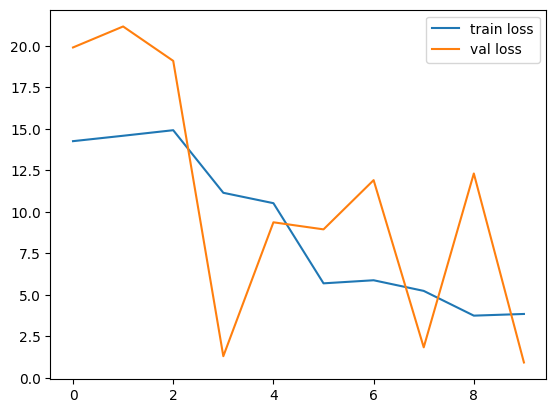

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('LossVal_loss')
plt.show()

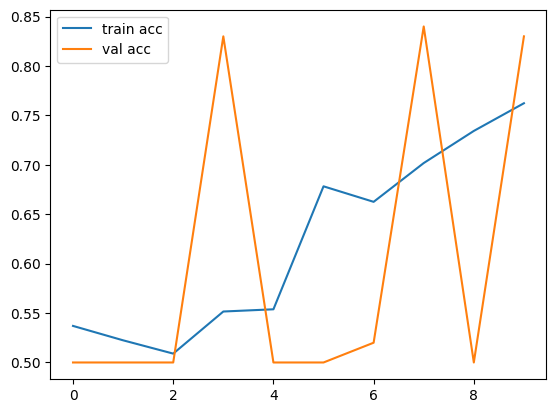

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<Figure size 640x480 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

model.save('facefeatures_new_model.h5')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D

# Define your model architecture (replace with your actual model)
model = Sequential([
    Conv2D(32, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    # ... add more layers and connections as needed
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model with optimizer and loss function
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
from keras.callbacks import Callback


# Define custom callback for calculating precision and recall per epoch
class MyCallback(Callback):
    def on_epoch_end(self, log):
        y_true = self.model.validation_data_generator.classes
        y_pred = np.argmax(self.model.predict(self.model.validation_data_generator), axis=1)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        print(f"Epoch {epoch + 1}: Precision: {precision:.4f}, Recall: {recall:.4f}")

# Train the model and print precision/recall per epoch
history_callback = MyCallback()
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=[history_callback],
)

# Plot training and validation loss
plt.plot(r.history["loss"], label="train loss")
plt.plot(r.history["val_loss"], label="val loss")
plt.legend()
plt.savefig("LossVal_loss")
plt.show()

# (Optional) Access precision and recall values from history
precision_values = r.history["precision"]
recall_values = r.history["recall"]


Epoch 1/10


InvalidArgumentError: ignored